In [1]:
import numpy as np
import numpy.random as random
from numpy.linalg import inv
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten
%matplotlib inline

In [2]:
def create_mixtures(A, size_Signal):
    x = np.arange(size_Signal)
    a = np.sin(4*x+np.cos(x))
    b = np.sin(2*x+np.pi/2)
    c = np.sin(3*x-np.pi/3)+np.cos(1.5*x-2*np.pi/5)
    d = np.sin(3*x)*np.sin(2*x)
    
    sources = np.array([a,b,c,d])
    return np.dot(A,sources), sources
                 
def g(y):
    #return np.multiply(np.power(y,2),np.sign(y))
    return np.tanh(10*y)

def f(y):
    return np.power(y,3)

def cichocki_Feedforward(mixtures, learning_rate):
    # FeedFoward
    I = np.identity(mixtures.shape[0])
    W = I
    y = np.zeros(mixtures.shape)
    dW = np.ones(W.shape) - I
    
    whitenedMixtures = whiten(mixtures)

    
    for i in np.arange(mixtures.shape[1]):
        input_ = np.reshape(mixtures[:,i], (whitenedMixtures.shape[0], 1))

        y[:,i] = np.reshape(np.dot(W, input_), (mixtures.shape[0],))
        gY = np.reshape(g(y[:,i]), (mixtures.shape[0],1))
        fY = np.reshape(f(y[:,i]), (mixtures.shape[0],1))
        
        dW = np.dot(I-np.dot(fY,np.transpose(gY)),W)
        W = W + learning_rate*dW
        if (np.isnan(W).any() == True):
            print('Lost convergence at iterator %d'%i)
            break
    return y, W

def cichocki_Backward(mixtures, learning_rate):
    # Feedback
    I = np.identity(mixtures.shape[0])
    W = np.zeros((mixtures.shape[0], mixtures.shape[0]))
    y = np.zeros(mixtures.shape)
    dW = np.ones(W.shape) - I
    i = 0
    
    whitenedMixtures = whiten(mixtures)

    for i in np.arange(mixtures.shape[1]):
        inversa = inv(I+W)
        input_ = np.reshape(mixtures[:,i], (whitenedMixtures.shape[0], 1))

        y[:,i] = np.reshape(np.dot(inversa, input_), (mixtures.shape[0],))
        gY = np.reshape(g(y[:,i]), (mixtures.shape[0], 1))
        fY = np.reshape(f(y[:,i]), (mixtures.shape[0], 1))

        dW = np.dot((I+W),I-np.dot(fY,np.transpose(gY)))
        W = W - learning_rate*dW

        if (np.isnan(W).any() == True):
            print('Lost convergence at iterator %d'%i)
            break
    return y, W



In [3]:
number_Mixtures = 4
size_Signal = 1000
#W  = np.random.randn(number_Mixtures,number_Mixtures)
Wback = np.zeros((number_Mixtures,number_Mixtures))
y = np.zeros((number_Mixtures, size_Signal))
learning_rate = 0.00001
n = 0
A = np.random.randint(10, size=(number_Mixtures, number_Mixtures))
mixtures, sources = create_mixtures(A,size_Signal)
print(A)
plt.show()

[[1 9 8 0]
 [6 4 3 7]
 [0 3 7 5]
 [4 1 1 8]]


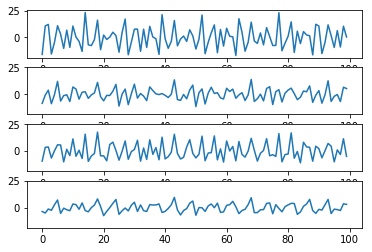

In [4]:
h, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharey=True)
ax1.plot(mixtures[0,900:])
ax2.plot(mixtures[1,900:])
ax3.plot(mixtures[2,900:])
ax4.plot(mixtures[3,900:])
plt.show()

In [5]:
[yfor, Wfor] = cichocki_Feedforward(mixtures, learning_rate)

In [6]:
print(inv(Wfor))
print(A)

[[ 2.9696973   0.5522561   1.84618879 -0.2686362 ]
 [ 0.75170671  1.67838925  0.43752873  0.59307454]
 [ 1.16900808  0.45685722  2.45707057  0.28019612]
 [ 0.17661755  0.44242252  0.17120713  1.44782435]]
[[1 9 8 0]
 [6 4 3 7]
 [0 3 7 5]
 [4 1 1 8]]


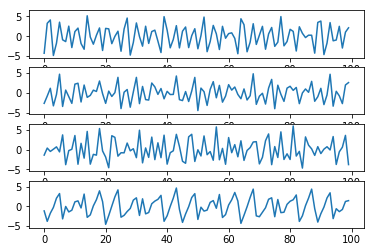

In [7]:
c, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharey=True)
ax1.plot(yfor[0,900:])
ax2.plot(yfor[1,900:])
ax3.plot(yfor[2,900:])
ax4.plot(yfor[3,900:])
plt.show()

In [8]:
[yback, Wback] = cichocki_Backward(mixtures, learning_rate)

In [9]:
print(Wback)
print(A)

[[ 1.96560656  0.54929019  1.84267448 -0.26504022]
 [ 0.7501812   0.67649905  0.43713113  0.59180713]
 [ 1.16625205  0.45464644  1.4536624   0.281465  ]
 [ 0.17576966  0.44114401  0.17098765  0.44672004]]
[[1 9 8 0]
 [6 4 3 7]
 [0 3 7 5]
 [4 1 1 8]]


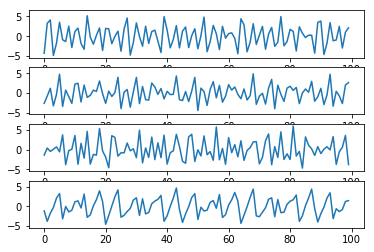

In [10]:
d, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharey=True)
ax1.plot(yback[0,900:])
ax2.plot(yback[1,900:])
ax3.plot(yback[2,900:])
ax4.plot(yback[3,900:])
plt.show()

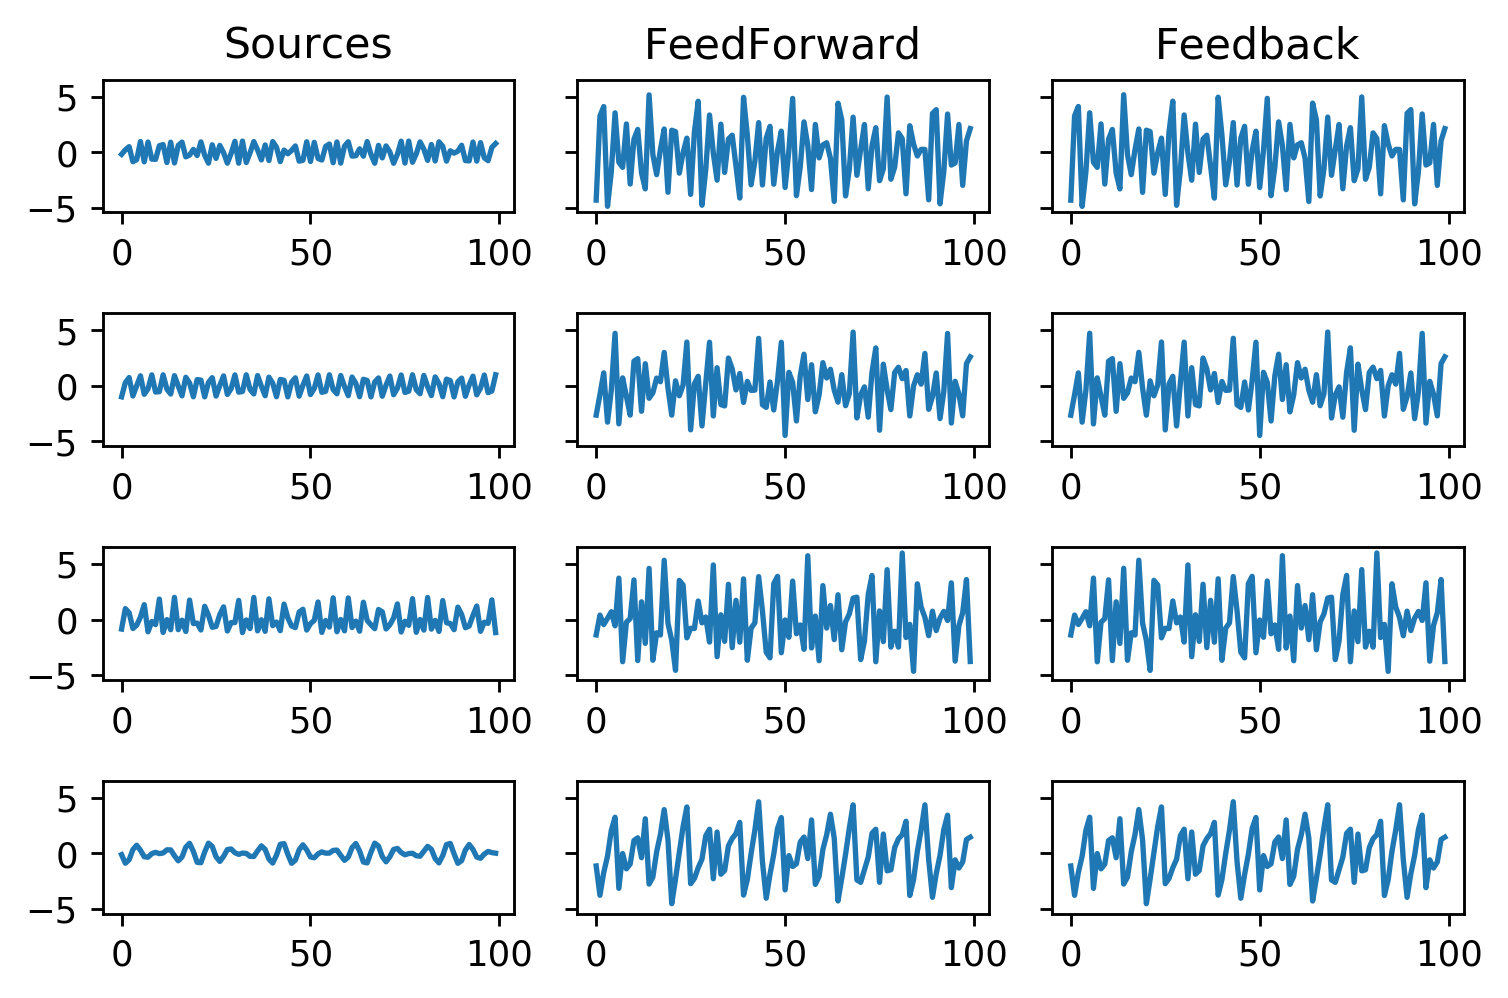

In [11]:
d, axes = plt.subplots(4, 3, sharey=True, dpi = 32*8)
axes[0,0].set_title('Sources')
axes[0,0].plot(sources[0,900:])
axes[1,0].plot(sources[1,900:])
axes[2,0].plot(sources[2,900:])
axes[3,0].plot(sources[3,900:])

axes[0,1].set_title('FeedForward')
axes[0,1].plot(yfor[0,900:])
axes[1,1].plot(yfor[1,900:])
axes[2,1].plot(yfor[2,900:])
axes[3,1].plot(yfor[3,900:])

axes[0,2].set_title('Feedback')
axes[0,2].plot(yback[0,900:])
axes[1,2].plot(yback[1,900:])
axes[2,2].plot(yback[2,900:])
axes[3,2].plot(yback[3,900:])

plt.tight_layout()
plt.show()